In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [6]:
#read file
df=pd.read_csv("Social_Network_Ads.csv")

In [7]:
df.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


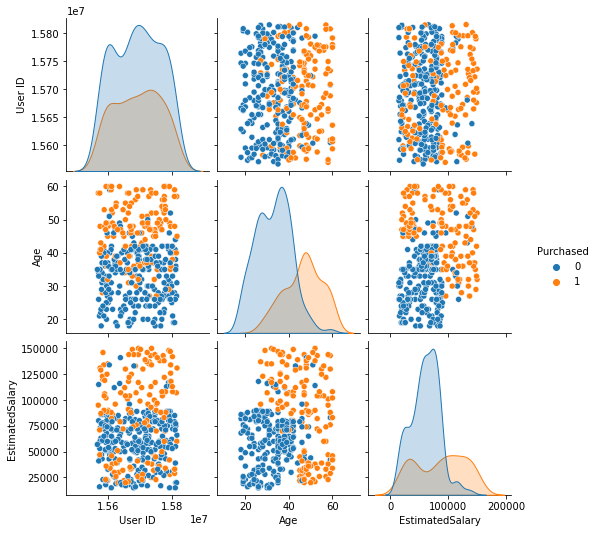

In [9]:
sns.pairplot(df,hue='Purchased')

In [10]:
#remove unwanted col
df.drop(columns='User ID',inplace=True)

In [11]:
df.head()

Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0
3  Female   27            57000          0
4    Male   19            76000          0

In [12]:
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [13]:
df.isnull().sum()

Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [14]:
#label Encoding of Gender col

from sklearn.preprocessing import LabelEncoder

In [15]:
le=LabelEncoder()

In [16]:
df_num=df.select_dtypes(int,float)
df_num

Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]

In [17]:
df_cat=df.select_dtypes(object)
df_cat

Gender
0      Male
1      Male
2    Female
3    Female
4      Male
..      ...
395  Female
396    Male
397  Female
398    Male
399  Female

[400 rows x 1 columns]

In [18]:
df_cat['Gender']=le.fit_transform(df_cat['Gender'])

In [19]:
df_cat

Gender
0         1
1         1
2         0
3         0
4         1
..      ...
395       0
396       1
397       0
398       1
399       0

[400 rows x 1 columns]

In [20]:
df_new=pd.concat([df_cat ,df_num],axis=1)

In [21]:
df_new.head()

Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0
3       0   27            57000          0
4       1   19            76000          0

In [22]:
# split the data

from sklearn.model_selection import train_test_split

In [23]:
x=df_new.iloc[:,0:-1]
x

Gender  Age  EstimatedSalary
0         1   19            19000
1         1   35            20000
2         0   26            43000
3         0   27            57000
4         1   19            76000
..      ...  ...              ...
395       0   46            41000
396       1   51            23000
397       0   50            20000
398       1   36            33000
399       0   49            36000

[400 rows x 3 columns]

In [24]:
y=df_new['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [25]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=0)

In [26]:
xtrain

Gender  Age  EstimatedSalary
250       0   44            39000
63        1   32           120000
312       0   38            50000
159       0   32           135000
283       0   52            21000
..      ...  ...              ...
323       0   48            30000
192       1   29            43000
117       1   36            52000
47        0   27            54000
172       0   26           118000

[300 rows x 3 columns]

In [27]:
#build model
from sklearn.neighbors import KNeighborsClassifier

In [28]:
knn=KNeighborsClassifier(n_neighbors=3)

In [29]:
knn.fit(xtrain,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [30]:
ypred=knn.predict(xtest)

In [31]:
#evalute model
from sklearn.metrics import accuracy_score

In [32]:
accuracy_score(ytest,ypred)

0.78

In [33]:
ac_list=[]
for i in range(1,31):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain,ytrain)
    ypred=knn.predict(xtest)
    ac=accuracy_score(ytest,ypred)
    ac_list.append(ac)






In [34]:
ac_list

[0.83,
 0.77,
 0.78,
 0.81,
 0.83,
 0.84,
 0.81,
 0.84,
 0.84,
 0.82,
 0.89,
 0.84,
 0.84,
 0.84,
 0.86,
 0.85,
 0.85,
 0.84,
 0.87,
 0.84,
 0.85,
 0.83,
 0.84,
 0.84,
 0.83,
 0.83,
 0.79,
 0.83,
 0.81,
 0.83]

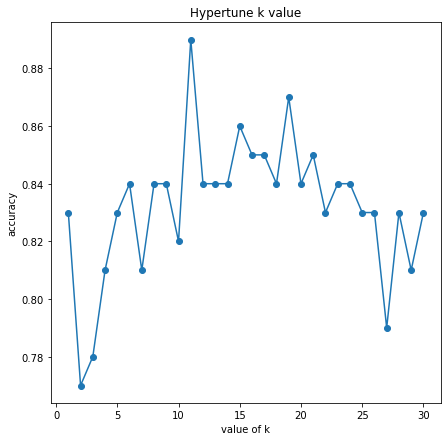

In [35]:
plt.figure(figsize=(7,7))
plt.title("Hypertune k value")
plt.plot(range(1,31),ac_list,marker='o')
plt.xlabel("value of k")
plt.ylabel('accuracy')
plt.show()

In [36]:
#build  final model
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=11)
knn.fit(xtrain,ytrain)
ypred=knn.predict(xtest)

In [37]:
#evalute model
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(ytest,ypred)

0.89

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(ytest,ypred)

array([[65,  3],
       [ 8, 24]], dtype=int64)